# COGS 108 - Final Project 

# Overview

Billboard has been tracking the popularity of songs with their Hot 100 since 1958, and the popularity of different types of songs have fluctuated throughout the history of the chart. However, what matters most in making a song popular? Is it tempo, key, or duration? Is it only the genre and artist of the song, or are there other factors that can influence a song's ranking on a chart? To determine this, we took the Spotify data of each song on the Billboard Hot 100 from 2000-2018 to find out what really makes a song hit the top of the charts.

# Names

- Christopher Wang
- Vikramadhitya Kalahasthi
- Bhavika Kaneria
- Yingshi Liang

# Group Members IDs

- Christopher Wang: A13757432
- Vikramadhitya Kalahasthi: A12958548
- Bhavika Kaneria: A13443269
- Yingshi Liang: A14064339

# Research Question

What is the **most important factor** in determining the **popularity of a song** considering the Spotify data about the song, including tempo, lyrics, key signature, loudness, duration, genre, etc., in the 21st century?


## Background and Prior Work

### Background

In order to determine the most important factor that makes a given song popular, we analyze the *Billboard Top 100 Singles* from 2000 to 2018. We obtain attributes about each song including genre, tempo, key, etc. We know that genres like *hip hop*, *trap*, and *electronic music* have seen a rise in popularity in recent years while other genres like *rock* have seen a decline.

### Prior Work

In the first project below, the author using Billboard Top 100 from 1950 to 2015 via the Spotify API analyzed the shift in popular music over time. The author of this project uses lyrics, loudness, and other factors to track trends of the music over time. The main takeaway was the decline of rock and the surge in hip hop as well as *love* being a key aspect of music overall.

In the second project below, the author used an automated machine learning platform called DataRobot to determine the most important attribute(s) in a successful popular song. The author found genre to be the most important factor and within that *rap* and *pop* to be the most prevalent genres. Hybrid genres were not as successful as standard ones.


References (include links):
- 1) https://towardsdatascience.com/billboard-hot-100-analytics-using-data-to-understand-the-shift-in-popular-music-in-the-last-60-ac3919d39b49
- 2) https://blog.datarobot.com/understanding-song-popularity-with-automated-machine-learning

# Hypothesis


We hypothesize that **genre** is the **most important factor** that contributes to a song’s popularity in the 21st century. We think this because of the dominance of genres like rap and R&B during this time, while genres like country and rock seem to have much lower rankings.

# Dataset(s)

- **dataset name**: Billboard Hot-100 Songs 2000-2018 w/ Spotify Data + Lyrics
- **number of observations (size of dataset)**: 7573 songs
- **link to the dataset (source)**: https://data.world/typhon/billboard-hot-100-songs-2000-2018-w-spotify-data-lyrics/workspace/file?filename=billboard_2000_2018_spotify_lyrics.csv

Spotify explains each of the variables (in the dataset for each song) in their API documentation. These are calculated by Spotify's algorithms.  Simplified, these are:
- **duration**: the duration of the track in ms  
- **key**: estimated key signature  
- **mode**: major or minor key   
- **time signature**: estimated time signature  
- **acousticness**: confidence measure of whether the track is acoustic or not   
- **danceability**: how suitable a track is for dancing based on a combo of musical elements  
- **energy**: perceptual measure of intensity and activity  
- **instrumentalness**: predicts whether a track contains no vocals  
- **liveness**: likelihood that a track is live  
- **loudness**: loudness averaged across the entire track in dB  
- **speechiness**: presence of spoken words in a track  
- **valence**: musical positiveness conveyed by a track  
- **tempo**: tempo in BPM

The full version of these can be found at https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/.  


In [1]:
# Imports 
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

In [2]:
df = pd.read_csv('billboard_2000_2018_spotify_lyrics.csv')

# Data Cleaning

Taking a look at the initial dataset, we can see there are some missing cells and several columns we will not be using, including the dates, variations of the titles and artists, last ranking and changes in ranking, and Spotify links associated with the song. We will be focusing specifically on the Spotify data given with the song.

In [3]:
df.head(10)

,date,year,title,simple_title,artist,main_artist,peak_pos,last_pos,weeks,rank,...,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode,lyrics
0,6/21/18,NaN,4th Dimension,NaN,Kanye West and Kid Cudi,NaN,42,0,1,42,...,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,Error: Could not find lyrics.
1,6/21/18,NaN,All Girls Are The Same,NaN,Juice WRLD,NaN,41,49,5,41,...,0.0769,0.000335,4,0.671,0,165820,-7.226,0.203,1,"They're rotting my brain, love\nThese hoes are..."
2,6/21/18,NaN,All Mine,NaN,Kanye West,NaN,11,11,2,31,...,0.125,0,4,0.925,11,145507,-6.562,0.265,0,"Yeah, you supermodel thick\nDamn, that ass bus..."
3,6/21/18,NaN,Alone,NaN,Halsey Featuring Big Sean & Stefflon Don,NaN,70,73,9,74,...,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,Error: Could not find lyrics.
4,6/21/18,NaN,Babe,NaN,Sugarland Featuring Taylor Swift,NaN,72,0,2,95,...,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,Error: Could not find lyrics.
5,6/21/18,NaN,Back To You,NaN,Selena Gomez,NaN,22,31,5,22,...,0.0945,1.68E-06,4,0.601,6,207905,-4.856,0.508,1,Took you like a shot\nThought that I could cha...
6,6/21/18,NaN,Ball For Me,NaN,Post Malone Featuring Nicki Minaj,NaN,16,63,7,59,...,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,Error: Could not find lyrics.
7,6/21/18,NaN,Be Careful,NaN,Cardi B,NaN,11,25,11,23,...,0.0256,0,4,0.82,6,210787,-8.23,0.535,0,"Yeah\nBe careful, be careful, be careful with ..."
8,6/21/18,NaN,Beautiful Crazy,NaN,Luke Combs,NaN,58,77,4,93,...,0.676,0,4,0.552,11,193200,-7.431,0.382,1,Her day starts with a coffee\nAnd ends with a ...
9,6/21/18,NaN,Better Now,NaN,Post Malone,NaN,7,34,7,20,...,0.354,0,4,0.68,10,231267,-5.843,0.374,1,"You probably think that you are better now, be..."


First, we drop rows with null data in broad_genre (we will not be using all the genres listed in the genre column and focusing on the main genre given as the broad_genre)

In [4]:
df.dropna(axis=0, subset=['broad_genre'], inplace=True)

We then drop rows with unknowns in broad_genre, analysis_url (not null, but data could not be found for these)

In [5]:
df = df[df['analysis_url'] != 'unknown']

In [6]:
df = df[df['broad_genre'] != 'unknown']

We then remove unnecessary columns for our data analysis (year/date, simple_title or title, main_artist, change, spotify_link, spotify_id, video_link, genre - keep broad_genre, analysis_url, lyrics)

In [7]:
cols_to_drop = ['date', 'lyrics', 'simple_title', 'last_pos', 'rank', 'main_artist', 'change', 'spotify_link', 'spotify_id', 'video_link', 'genre', 'analysis_url']
df.drop(cols_to_drop, axis=1, inplace=True)

Renaming the broad_genre column for clarity (broad_genre -> genre), 

In [8]:
df.rename(columns={'broad_genre': 'genre'}, inplace=True)

Converting year column to integer for readability

In [9]:
df['year'] = df['year'].astype('int32')

The dataframe now has no missing data, and has only the Spotify data that we need to analyze along with its popularity.

In [10]:
df.head(10)

,year,title,artist,peak_pos,weeks,genre,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode
367,2017,...Ready For It?,taylor swift,4,17,pop,0.776,0.155,160.053,0.127,0.0609,0,4,0.616,2,208187,-6.519,0.459,1
368,2017,1-800-273-8255,logic,3,35,rap,0.572,0.192,100.015,0.0387,0.57,0,4,0.629,5,250173,-7.733,0.386,0
370,2017,All I Want For Christmas Is You,mariah carey,9,24,r&b,0.625,0.0708,150.277,0.0386,0.164,0,4,0.335,7,241107,-7.462,0.346,1
371,2017,Attention,charlie puth,5,36,pop,0.626,0.0848,100.041,0.0432,0.0969,3.12E-05,4,0.774,3,211475,-4.432,0.777,0
372,2017,Bad At Love,halsey,8,17,rock,0.736,0.0879,118.369,0.0302,0.06,0,4,0.675,0,181279,-3.604,0.607,1
373,2017,Bank Account,21 savage,12,25,rap,0.346,0.0871,75.016,0.351,0.0151,7.04E-06,4,0.884,8,220307,-8.228,0.376,0
374,2017,Bartier Cardi,cardi b,14,1,pop,0.524,0.383,138.015,0.181,0.00111,0.000678,4,0.908,1,224285,-7.955,0.109,1
375,2017,Believer,imagine dragons,4,47,rock,0.78,0.118,124.953,0.102,0.0492,0,4,0.784,10,204347,-4.275,0.722,0
376,2017,Betrayed,lil xan,67,7,rap,0.419,0.105,119.958,0.165,0.416,0,4,0.823,10,187453,-10.358,0.277,0
377,2017,Black & Chinese,huncho jack,71,1,rap,0.842,0.123,159.132,0.101,0.00277,0.000974,4,0.663,1,172017,-4.152,0.346,1


# Data Analysis & Results

Correlation =  -0.7318144512936112


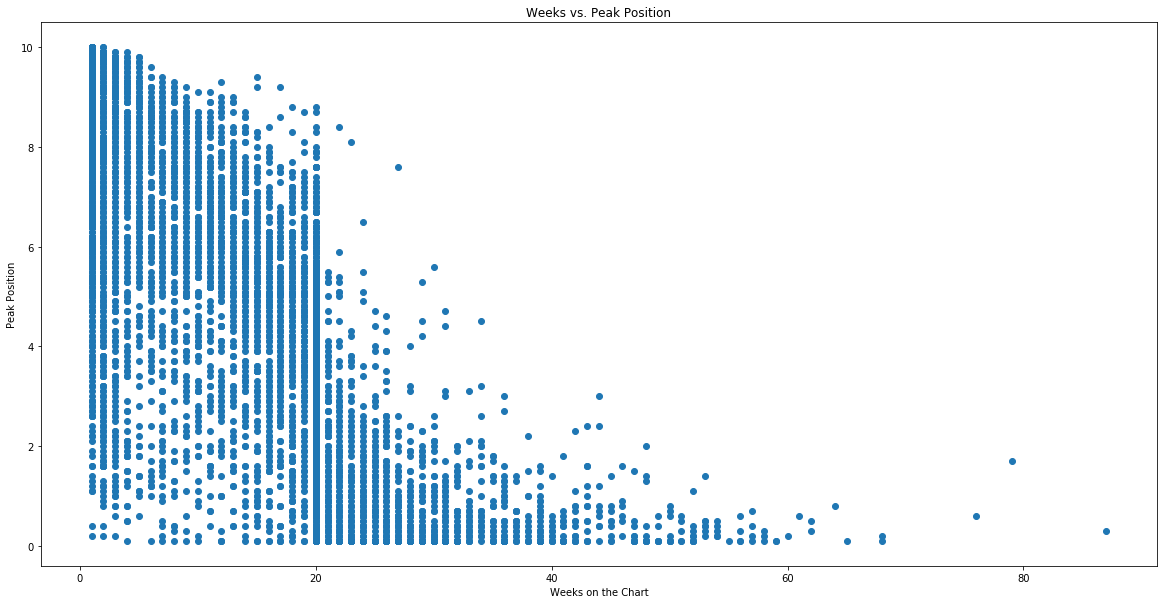

In [11]:
#compare/graph every song's weeks spent on the chart to its peak position
x = df['weeks']
y = df['peak_pos'].div(10)
plt.figure(figsize=(20, 10))
plt.ylabel("Peak Position",)
plt.xlabel("Weeks on the Chart")
plt.title("Weeks vs. Peak Position")
plt.scatter(x,y)
#correlation
correlation = np.corrcoef(x,y)[0,1]
print("Correlation = ", correlation)

As we previously believed, a song's weeks on the chart and peak position have a strong negative correlation. This means that the lower (or better) the peak position is, the more amount of time a song spends on the charts. We can use this graph to possibly predict how long a song will spend on the charts if we already know its peak position. Based on this graph, we are going to compare other attributes of a song to its peak position, as we believe this most accurately represents a song's popularity.

energy correlation =  0.012794515622762768


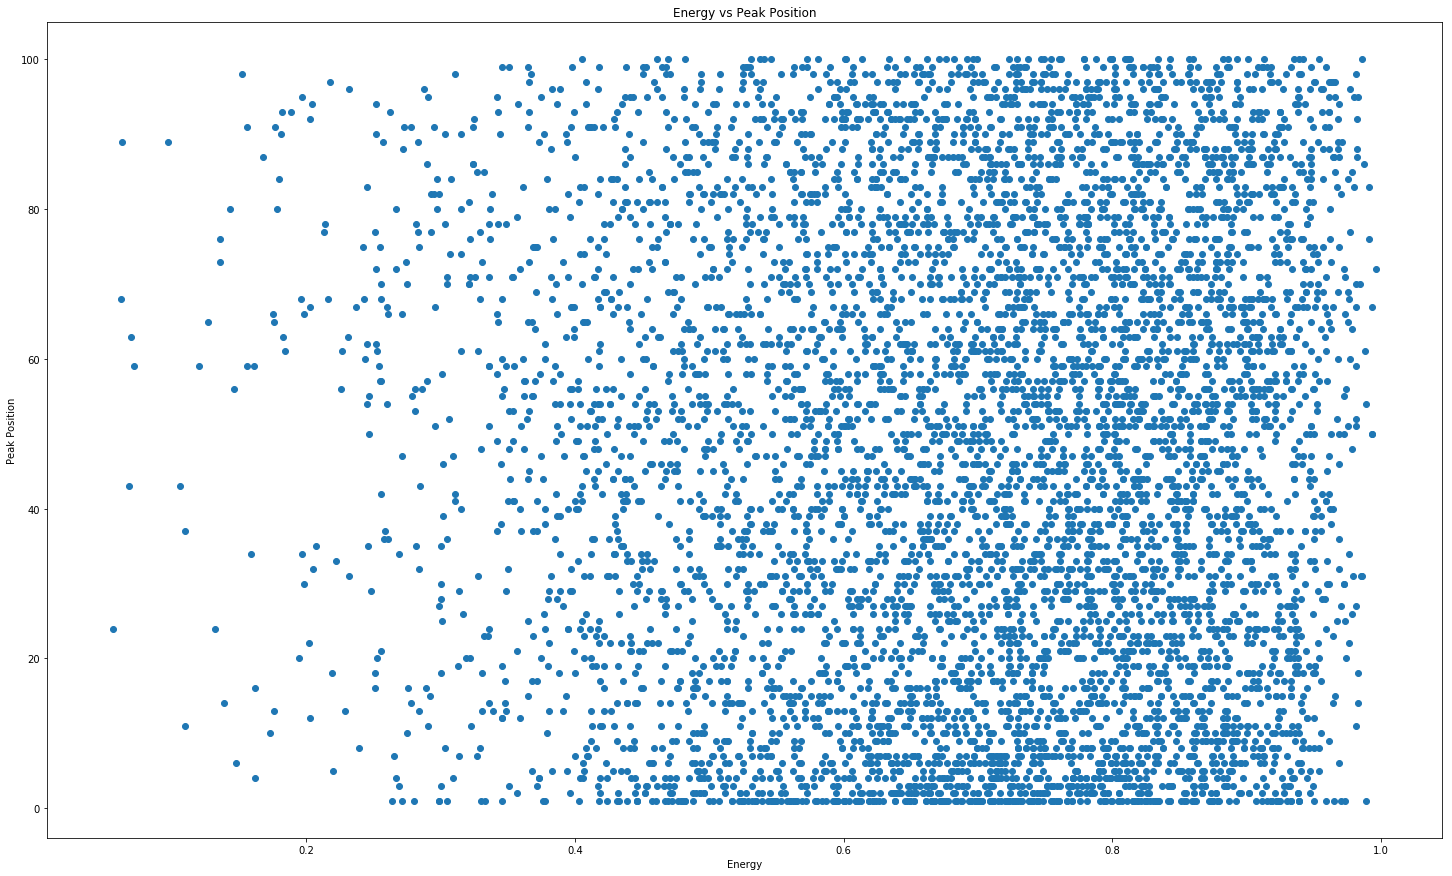

In [12]:
#compare every song's energy value to its peak position on the charts
x = df['energy'].astype(float)
y = df['peak_pos']
plt.figure(figsize=(25, 15))
plt.ylabel("Peak Position")
plt.xlabel("Energy")
plt.title("Energy vs Peak Position")
plt.scatter(x,y)

#correlation
energycorrelation = np.corrcoef(x,y)[0,1]
print("energy correlation = ", energycorrelation)

There is a very small correlation of about .012 between the energy of a song and its popularity. The energy of a song is measured on a scale of 0 to 1.0, with values closer to 1 indicating a "higher energy" song. The songs with higher energy are slightly more likely to have a higher peak position, but again, there is a very low correlation. After looking at this scatter plot, we thought that analyzing valence (the relative "positiveness" of a song) might give us a better indication as to what type of songs are more popular on the charts.

valence correlation =  -0.08114021860637731


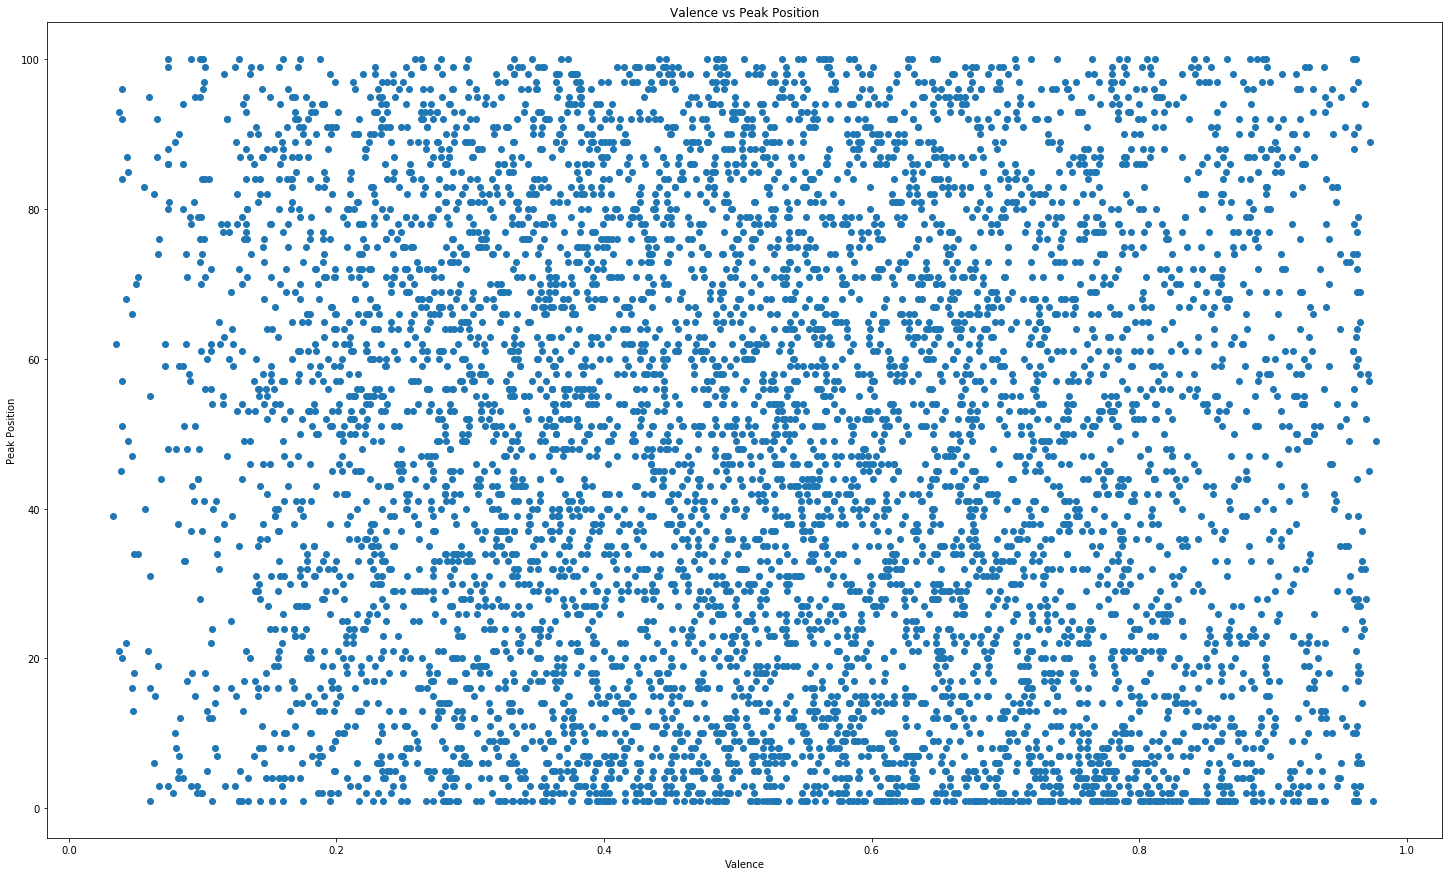

In [13]:
#compare every song's valence to its peak position on the charts
x = df['valence'].astype(float)
y = df['peak_pos']
plt.figure(figsize=(25, 15))
plt.ylabel("Peak Position")
plt.xlabel("Valence")
plt.title("Valence vs Peak Position")
plt.scatter(x,y)

#correlation
valencecorrelation = np.corrcoef(x,y)[0,1]
print("valence correlation = ", valencecorrelation)

As shown by this scatter plot, there is little correlation between the valence (musical positiviveness) of the song and its popularity. Valence is scaled in the range of [0, 1], so there is not much correlation as indicated by the correlation factor (-0.081)

danceability correlation =  -0.11136657657282283


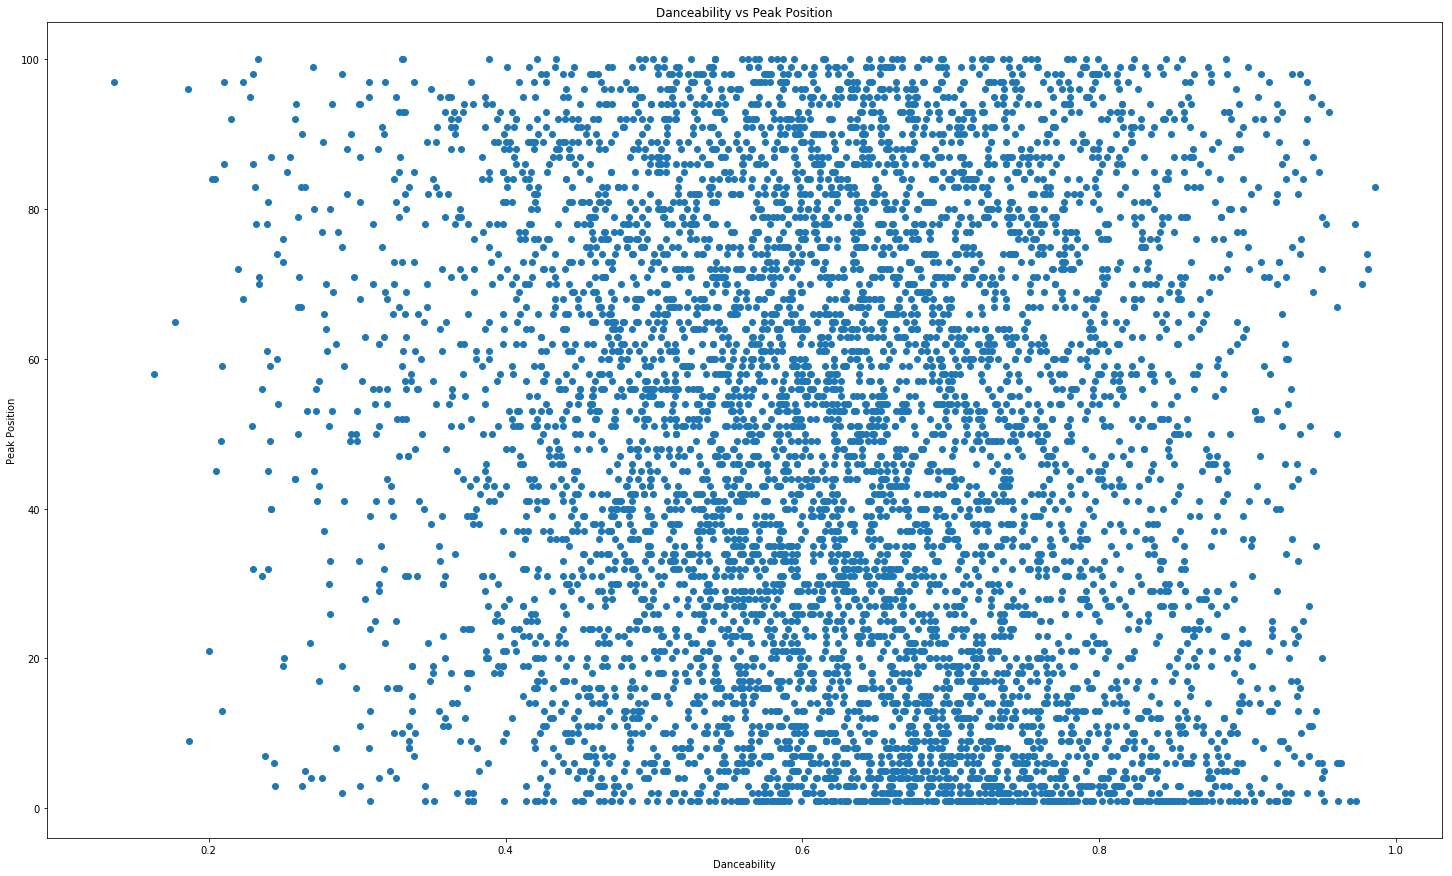

In [14]:
#compare every song's energy value to its peak position on the charts
x = df['danceability'].astype(float)
y = df['peak_pos']
plt.figure(figsize=(25, 15))
plt.ylabel("Peak Position")
plt.xlabel("Danceability")
plt.title("Danceability vs Peak Position")
plt.scatter(x,y)

#correlation
dancecorrelation = np.corrcoef(x,y)[0,1]
print("danceability correlation = ", dancecorrelation)

There is minimal negative correlation between the danceability of a song and its popularity. Danceability is normalized to scale in the range of [0, 1], but the correlation factor is -0.11, so danceability has minimal impact on a song's popularity.

100

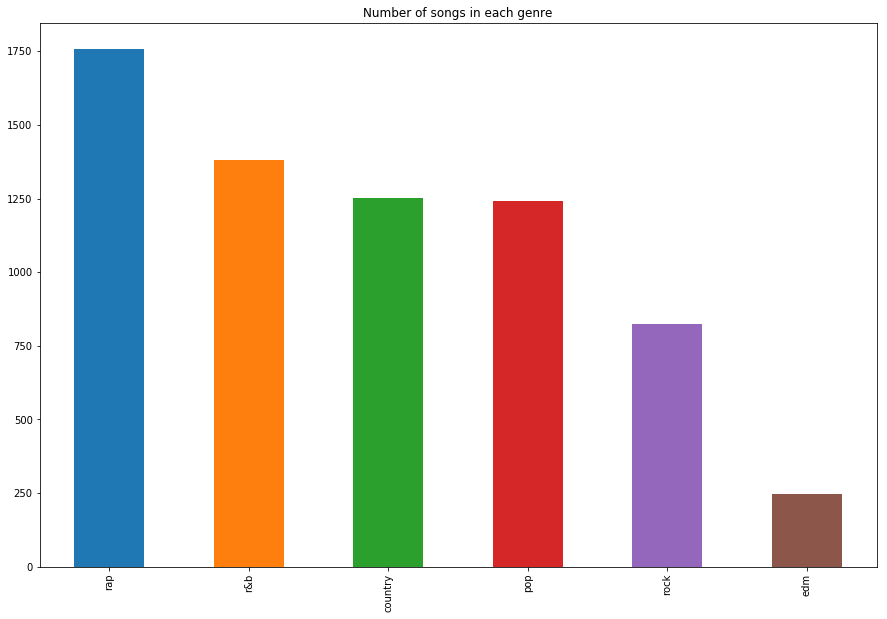

In [15]:
#number of songs whose peak position was in top 100 for each genre
df['genre'].value_counts().plot.bar(figsize=(15, 10), 
                                    title="Number of songs in each genre",
                                    label='Genre')
df['peak_pos'].max()

The bar graph above compares the number of songs in each genre across the whole dataset. In the following data analysis, the four genres that has over 1000 songs (Rap, R&B, Pop, Country) are chosen to compare their trends over the period of time given by the dataset.

In [16]:
#Normalizing popularity of each genre by mean peak position

rap_norm = df[df['genre'].isin(['rap'])].peak_pos.mean()
rb_norm = df[df['genre'].isin(['r&b'])].peak_pos.mean()
pop_norm = df[df['genre'].isin(['pop'])].peak_pos.mean()
country_norm = df[df['genre'].isin(['country'])].peak_pos.mean()
rock_norm = df[df['genre'].isin(['rock'])].peak_pos.mean()
edm_norm = df[df['genre'].isin(['edm'])].peak_pos.mean()

normalized_popularity = [rap_norm, rb_norm, pop_norm, 
                         country_norm, rock_norm, edm_norm]
table = pd.DataFrame(index=df.genre.value_counts().index, 
                     data=normalized_popularity, columns = ['mean peak pos'])
print(table)
table.describe()

         mean peak pos
rap          49.891354
r&b          40.615051
country      44.983884
pop          50.960894
rock         48.432039
edm          48.262097


,mean peak pos
count,6.000000
mean,47.190886
std,3.802786
min,40.615051
25%,45.803437
50%,48.347068
75%,49.526525
max,50.960894


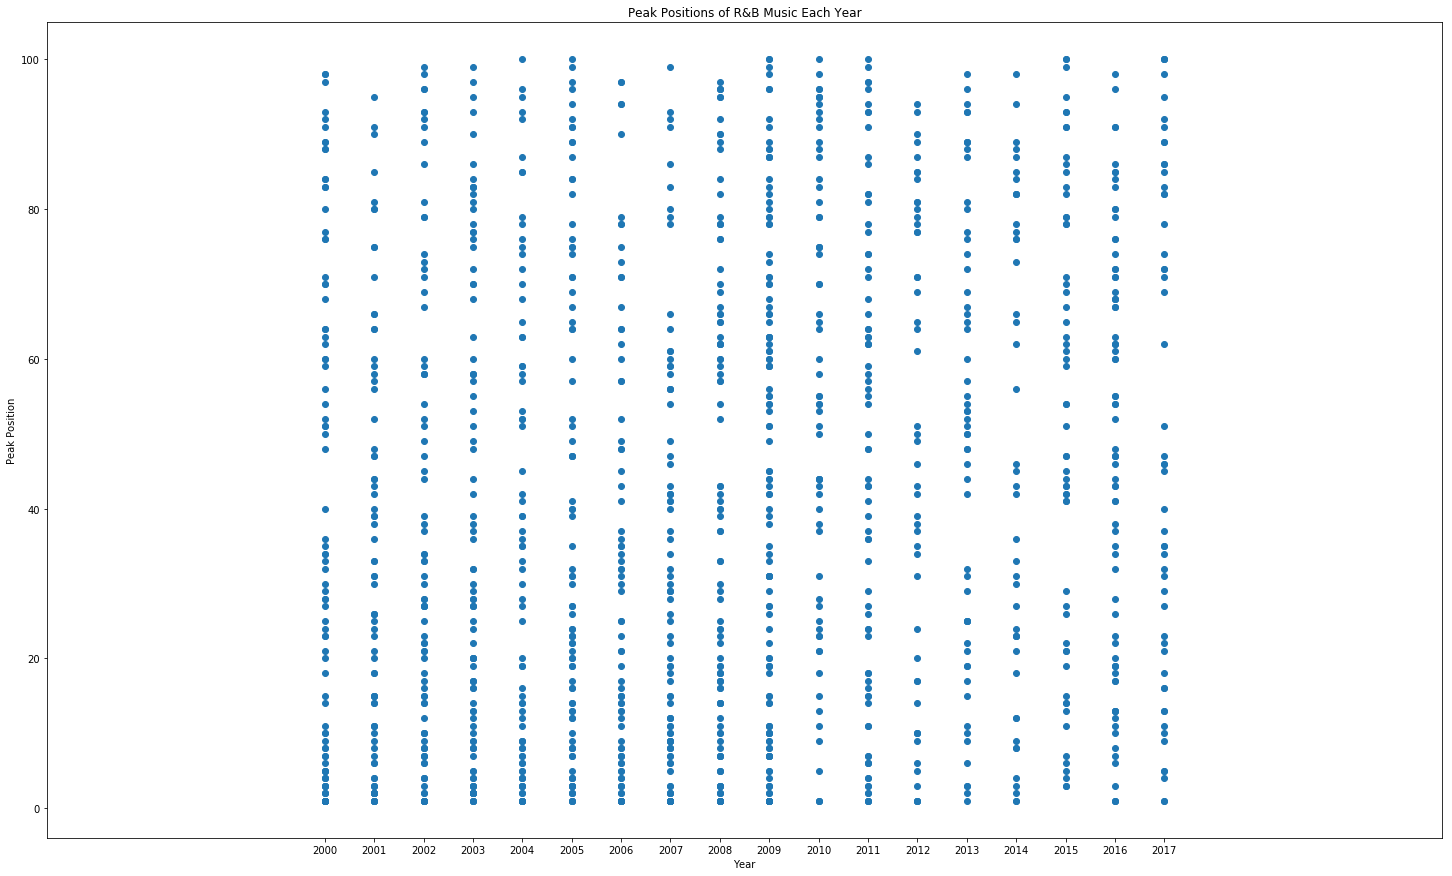

In [17]:
#Make a DataFrame of all songs from the genre R&B, convert the dates to year, 
#and plot their popularity over time
rb = df[df['genre'].isin(['r&b'])]

plt.figure(figsize=(25, 15))
plt.ylabel("Peak Position")
plt.xlabel("Year")
plt.title("Peak Positions of R&B Music Each Year")
plt.xticks(range(2000, 2018))
plt.scatter(rb.year, rb.peak_pos)

As shown by the scatter plot above, the popularity of R&B music starts declining after the year of 2009--in addition to the fewer songs present in the top 100 starting in 2010, the density of songs in the top 20 is also lower after the year of 2009.

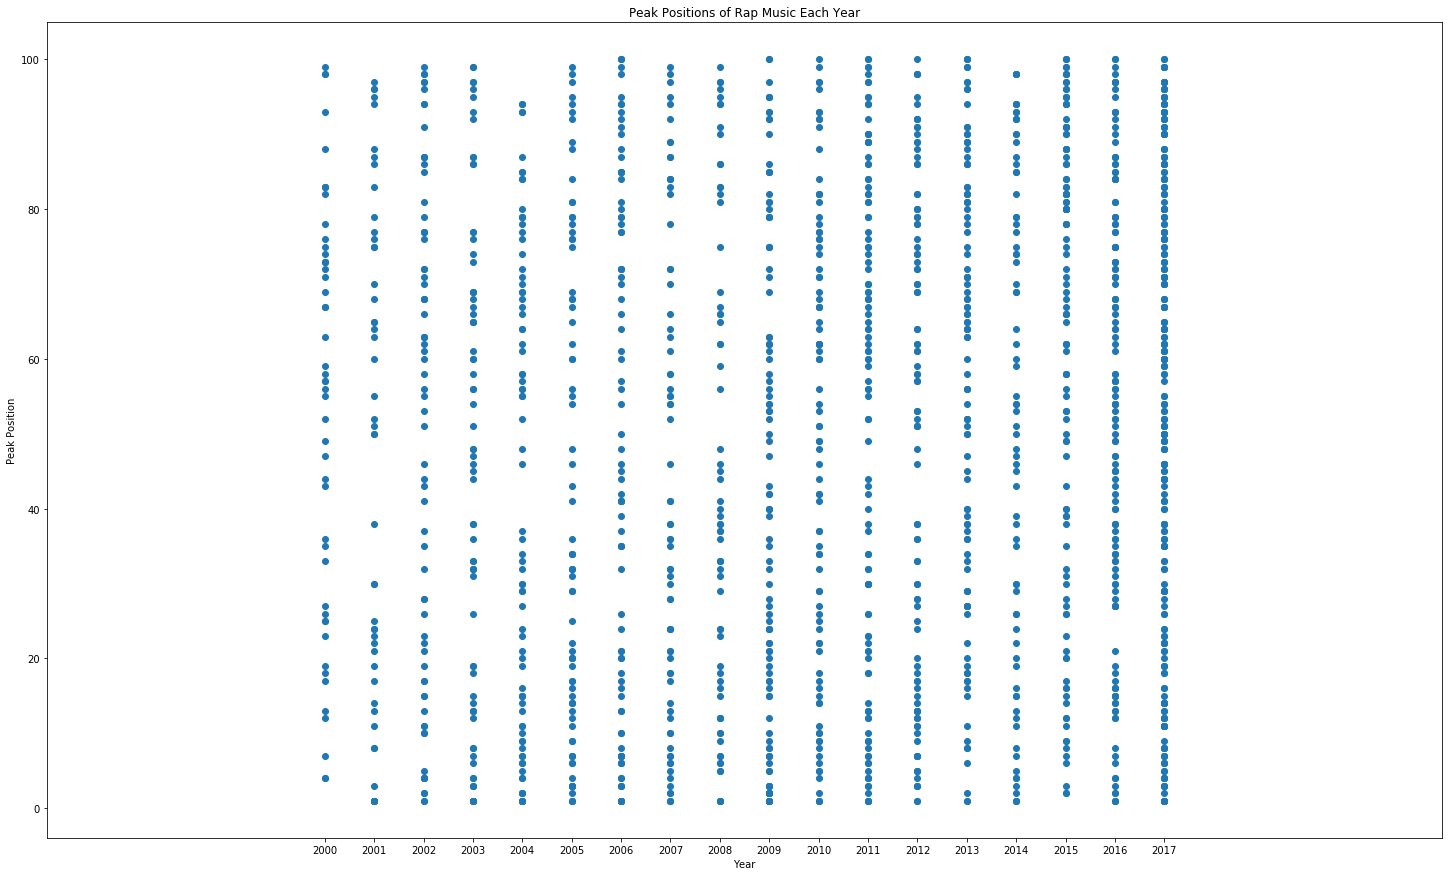

In [18]:
#Make a DataFrame of all songs from the genre Rap, convert the dates to year, 
#and plot their popularity over time
rap = df[df['genre'].isin(['rap'])]

plt.figure(figsize=(25, 15))
plt.ylabel("Peak Position")
plt.xlabel("Year")
plt.title("Peak Positions of Rap Music Each Year")
plt.xticks(range(2000, 2018))
plt.scatter(rap.year, rap.peak_pos)


As shown by the scatter plot above, the popularity of rap music is peaking in the year of 2017, which has doubled the density of songs in top 100 compared to 2016.

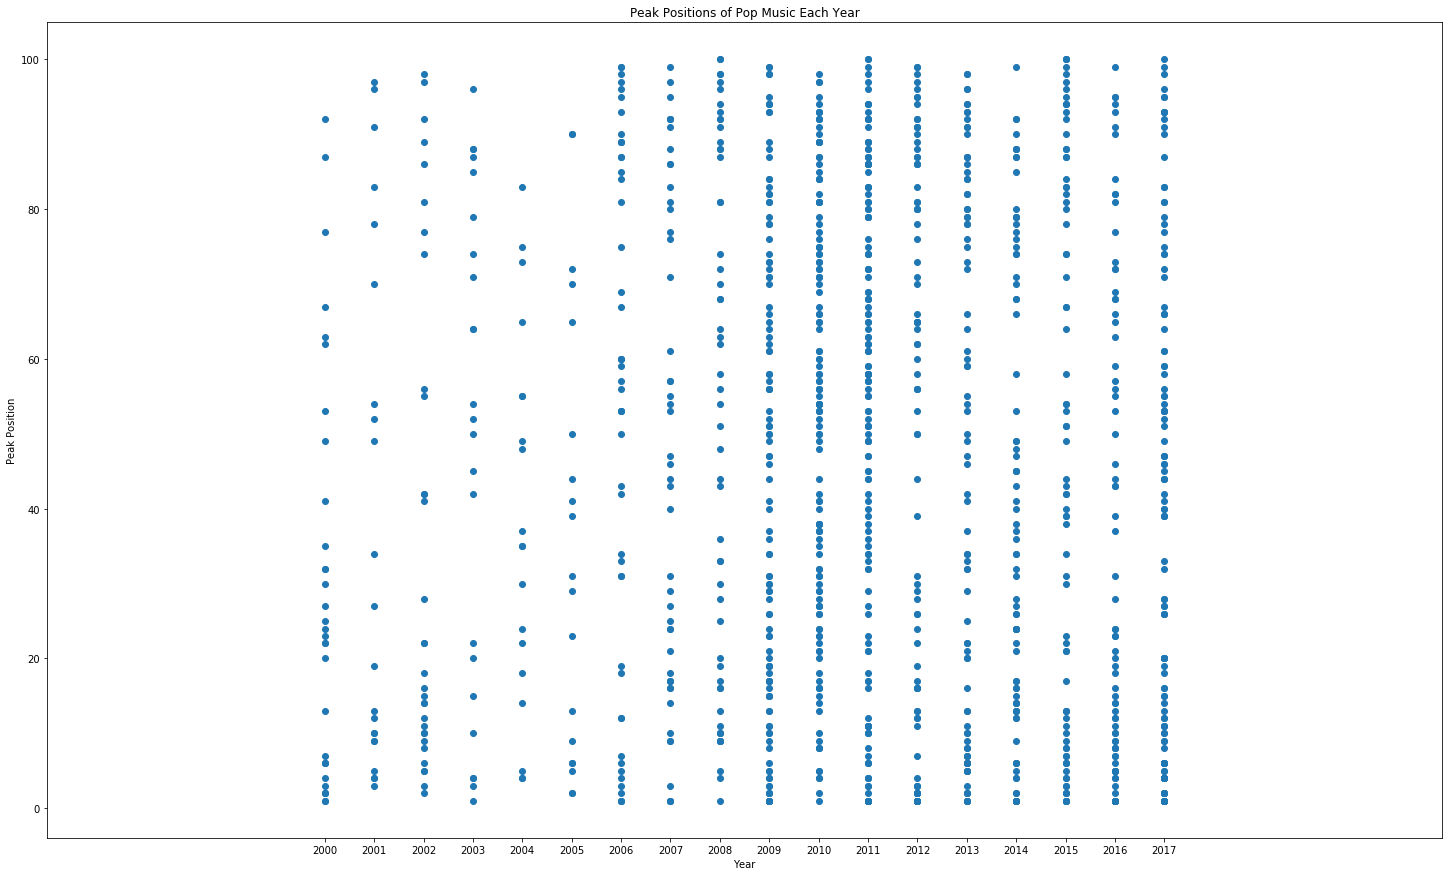

In [19]:
#Make a DataFrame of all songs from the genre Pop, convert the dates to year, 
#and plot their popularity over time
pop = df[df['genre'].isin(['pop'])]

plt.figure(figsize=(25, 15))
plt.ylabel("Peak Position")
plt.xlabel("Year")
plt.title("Peak Positions of Pop Music Each Year")
plt.xticks(range(2000, 2018))
plt.scatter(pop.year, pop.peak_pos)

Pop does not seem too popular before 2009, since the density of songs look very scarce compared to the years of 2009-2011. Pop music also have higher density in the Top 20 during the years of 2015-2017 than the previous years (except 2009).

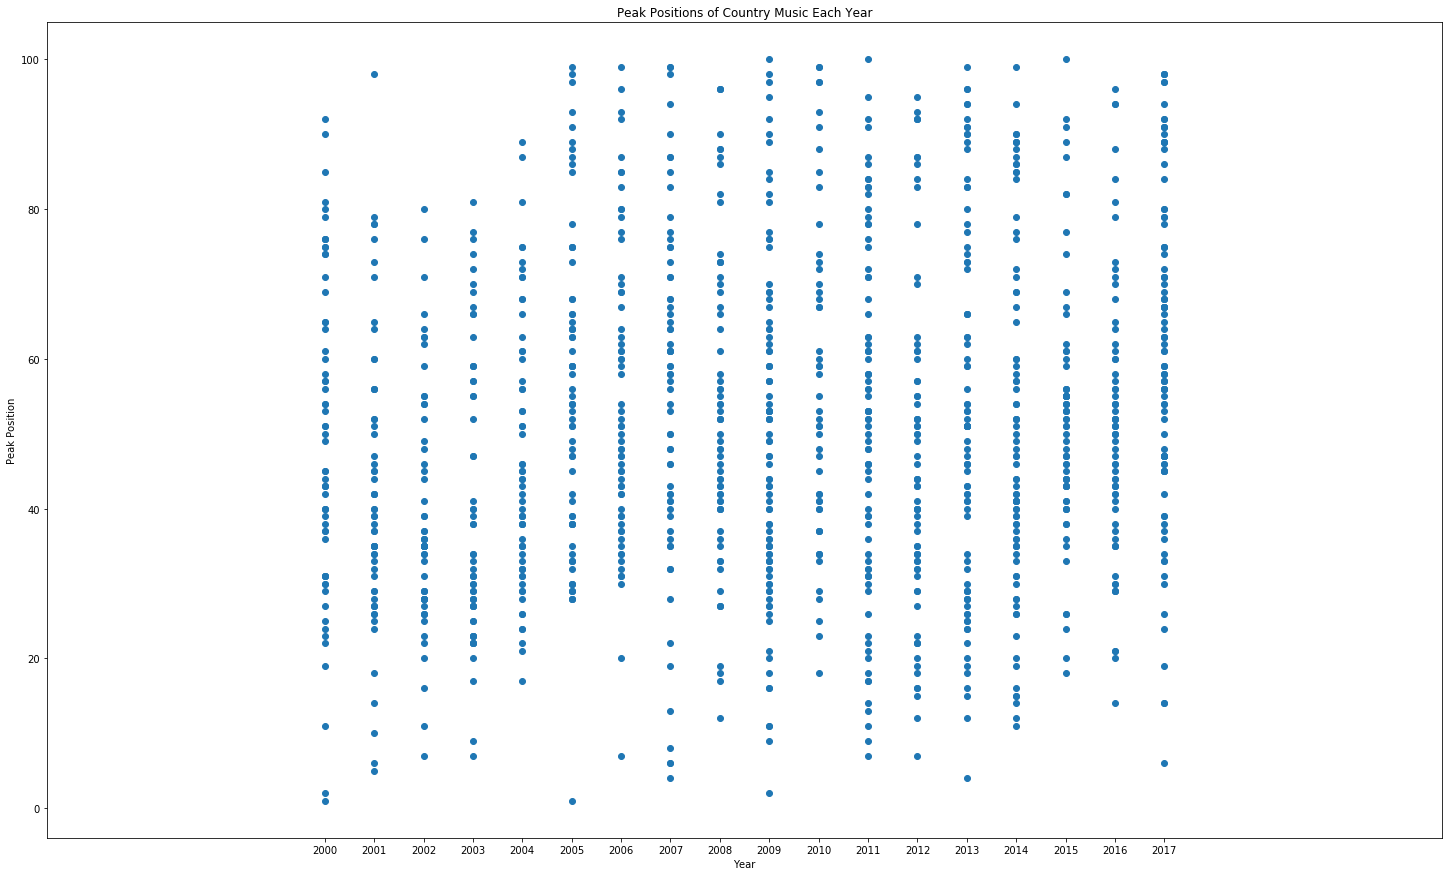

In [20]:
#Make a DataFrame of all songs from the genre Country, convert the dates to year, 
#and plot their popularity over time
country = df[df['genre'].isin(['country'])]

plt.figure(figsize=(25, 15))
plt.ylabel("Peak Position")
plt.xlabel("Year")
plt.title("Peak Positions of Country Music Each Year")
plt.xticks(range(2000, 2018))
plt.scatter(country.year, country.peak_pos)

Although the genre country has more than 1000 songs in total in the dataset, they are mostly distributed between Peak Positions between #20 and #60. 

In [21]:
'''
Make a DataFrame showing the number of songs per year in each genre, and the 
total number of songs from the original dataset per year including all genre.
As shown by the DataFrame, Year 2017 has almost doubled the total number of 
entries than the previous years. 
'''
num_per_year = pd.DataFrame(df.year.value_counts())
num_per_year.columns=['total']
num_rb = pd.DataFrame(rb.year.value_counts())
num_rb.columns = ['R&B']
num_rap = pd.DataFrame(rap.year.value_counts())
num_rap.columns = ['Rap']
num_pop = pd.DataFrame(pop.year.value_counts())
num_pop.columns = ['Pop']
num_country = pd.DataFrame(country.year.value_counts())
num_country.columns = ['Country']

num_per_year.index.name = 'year'
entries = 
    (((num_per_year.join(num_rb)).join(num_rap)).join(num_pop)).join(num_country)
entries = entries.sort_index(ascending=True)
entries

,total,R&B,Rap,Pop,Country
year,,,,,
2000,280,89,49,32,62
2001,249,78,48,22,58
2002,293,85,71,32,57
2003,301,92,73,23,59
2004,289,78,81,19,62
2005,330,90,78,19,69
2006,358,78,88,48,63
2007,346,90,72,48,64
2008,368,102,67,55,64


Text(0.5,1,'Number of Songs in Each Genre by Year')

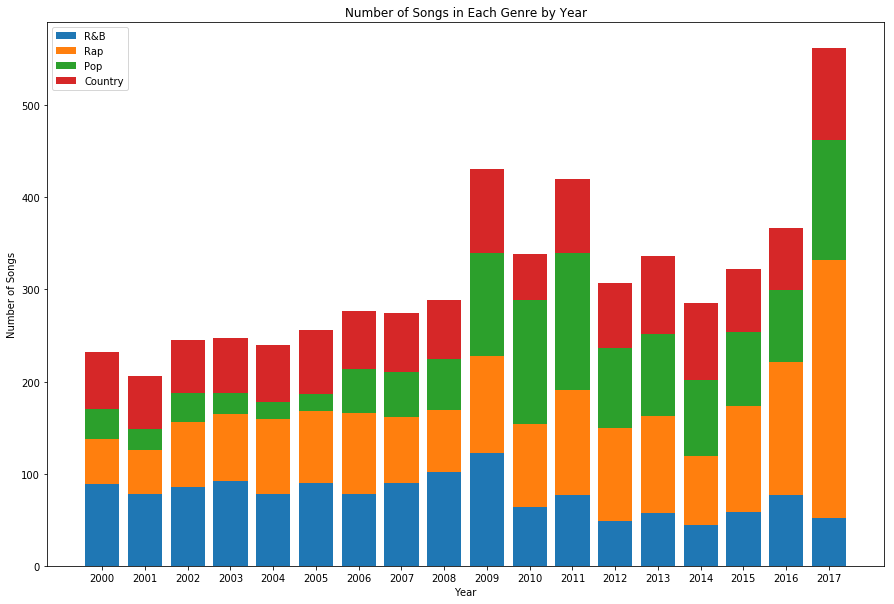

In [22]:
#bar graphs showing total and proportions of each year for each genre
plt.figure(figsize=(15, 10))
p1 = plt.bar(entries.index, entries['R&B'])
p2 = plt.bar(entries.index, entries['Rap'], bottom = entries['R&B'])
p3 = plt.bar(entries.index, entries['Pop'], bottom = entries['Rap'] + entries['R&B'])
p4 = plt.bar(entries.index, entries['Country'], bottom = entries['Pop'] + entries['Rap'] 
             + entries['R&B'])

plt.legend((p1[0],p2[0],p3[0],p4[0]), ('R&B','Rap','Pop','Country'))
plt.xticks(range(2000, 2018))
plt.yticks(np.arange(0,600,step=100))
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.title('Number of Songs in Each Genre by Year')

Text(0.5,1,'Ratio of Each Genre by Year')

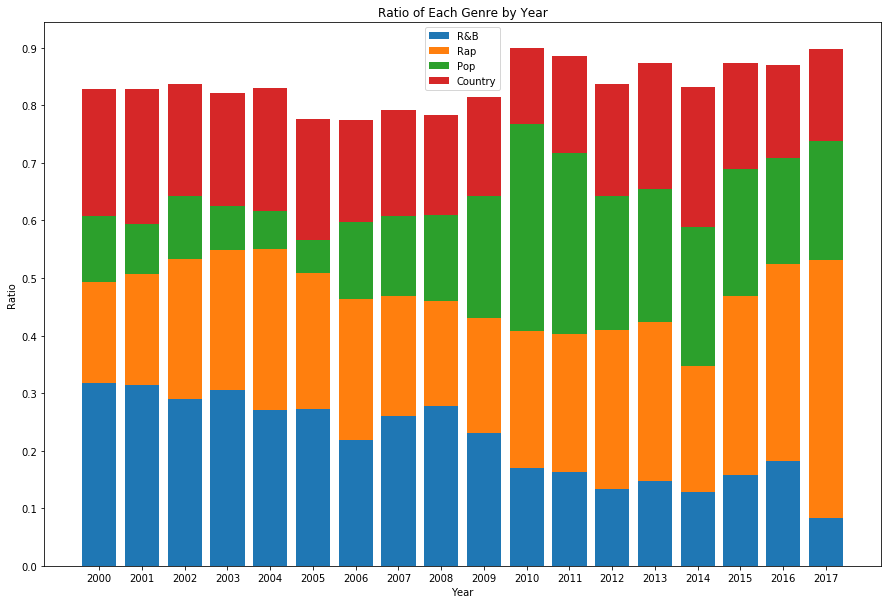

In [23]:
ratio_rb = np.divide(entries['R&B'], entries['total'])
ratio_rap = np.divide(entries['Rap'], entries['total'])
ratio_pop = np.divide(entries['Pop'], entries['total'])
ratio_country = np.divide(entries['Country'], entries['total'])

plt.figure(figsize=(15, 10))
p1 = plt.bar(entries.index, ratio_rb)
p2 = plt.bar(entries.index, ratio_rap, bottom = ratio_rb)
p3 = plt.bar(entries.index, ratio_pop, bottom = ratio_rap + ratio_rb)
p4 = plt.bar(entries.index, ratio_country, bottom = ratio_pop + ratio_rap + ratio_rb)

plt.legend((p1[0],p2[0],p3[0],p4[0]), ('R&B','Rap','Pop','Country'))
plt.xticks(range(2000, 2018))
plt.yticks(np.arange(0,1,step=0.1))
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.title('Ratio of Each Genre by Year')

As seen in this stacked bar graph, pop music becomes much more popular starting in 2009. R&B has been declining in general. Popularity of rap starts rising in 2016 and increases even more in 2017

## OLS Regression

We can use an OLS regression to explore the relationship between each genre and peak position.

In [24]:
mdf = df
genre = mdf['genre']
peak = mdf['peak_pos']

In [25]:
outcome, predictors = patsy.dmatrices('peak ~ genre', mdf)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   peak   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     21.95
Date:                Wed, 12 Jun 2019   Prob (F-statistic):           7.13e-22
Time:                        19:17:06   Log-Likelihood:                -32289.
No. Observations:                6706   AIC:                         6.459e+04
Df Residuals:                    6700   BIC:                         6.463e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        50.9609      0.843     60.417

# T-Test
Null Hypothesis: There is no correlation between rank and genre.
Alternative Hypothesis: There is a correlation between rank and genre.

We use alpha = 0.05. 

We observe that pop and r&b are less than alpha, so we reject the null hypothesis and conclude that these genres do not have a correlation between rank and genre.

EDM, pop, and rock have a P>|t| value greater than the alpha value so we fail to reject the null hypothesis and conclude that there is a correlation between rank and genre for these genres.


As we can see from the results, the regression yielded some interesting information. We see that *R&B* has a high coefficient, so we see that the genre has a stronger relationship with the peak position. If a song has the genre *R&B*, it is more likely to be within a certain peak position range than if the song was from another genre. On the other hand, looking at *rap*, it appears there exists less of a relationship between the genre and a range of peak positions. By interpreting the t-score, it is also confirmed that the peak positions of the genres pop and R&B are more correlated because higher absolute t-score means smaller standard error.

# Ethics & Privacy

We obtained our data from the user 'typhon' from the website data.world, who compiled together a list of Billboard songs with their Spotify metrics since 2000. We did not directly scrape this data ourselves or get the data from Billboard or Spotify directly. Because Billboard Hot 100, Spotify song data, and the dataset we used are all public, we ran into no issues with data privacy or permissions.

There is a possible bias in the data, as we have taken individual song data from Spotify metrics. While we know what Spotify wants them to represent, we do not necessarily know how they are calculated and how accurate to each song they are. With that being said, many of the values are simply predictive values with a large dataset to back them up so we can be reasonably confident that the values are fairly accurate. Second, Billboard Hot 100's data collection has changed throughout time, and the importance of streaming and downloads have went up in determining the ranking of the song, and since the range of our dataset is from 2000-2018, some songs that are streamed more may not have as large of an effect. Overall though, Billboard should have a fairly balanced and equal weighting for their song rankings. A final effect of our bias is that our research is mostly US-based, so the entire rest of their world and their music tastes have a much smaller effect on the Billboard rankings. However, there is no way around this as we are focused on Billboard 100.

Because our project is related to the popularity of a song, it is possible that a company or artist can use our findings in order to "game" the system and develop the perfect popular song. However, the music industry has already been doing this for decades in order to create perfect pop songs and artists, which also requires significant talent, so it is unlikely that our data is new to any interested parties.

# Conclusion & Discussion

The dataset we downloaded from the user ‘typhon’ on the site data.world took Billboard Hot 100 chart data and combined it with the Spotify song data for each song from the years 2000-2018. We were trying to determine the most important aspect of determining a song’s popularity on the chart. We guessed that genre would probably be the most dominant aspect of a song’s popularity, but we wanted to know if other factors included in the Spotify API like loudness and danceability had an effect on the song’s rankings. There were some limitations of this project: the results of song popularity are biased towards the US, with the popularity of the song coming entirely from the Billboard Hot 100 chart, and the Spotify API data is also fairly limiting, as it is not entirely clear how the values are determined and how accurate they are.

To no surprise, we found a strong negative correlation between a song’s peak position and its time on the chart, meaning that the better a song’s position was, the longer it spent on the top 100. We used this as a standard for the other measures to compare to, but to our surprise song attributes like energy, valence, and danceability of a song when compared to peak position had minimal correlations. We then shifted our focus on the genre of the song, and found the four most popular genres(rap, pop, R&B, country) and compared these to peak position. From this, we can indeed see that rap has been the most popular genre since 2015, with a contributing factor being the sudden increase of rap songs in 2017 by around 200 from the previous year. It is possible that there was an uptick of Spotify users or if songs from previous years were cleaned due to missing data in genre. R&B is the second most popular genre in the overall dataset, but was the most popular until 2010 when pop took it over suddenly. From this, we can assume that rap will continue to reign as the most popular genre while R&B will likely decline.

What we found out is likely not new to any music companies, and hammers in the fact that the genre of the song is extremely important for any song, and we shifted our focus onto analyzing genres year-by-year. What was surprising is that we found the other aspects of the song like danceability and valence had little to no correlation with how the song was ranked. This shows that there is possibly a lot more variety on Billboard Hot 100 than the typical high-energy pop songs that we associate with the chart, especially towards the lower ranks. Overall, we found that the most popular genres on the Billboard Hot 100 as of today are rap, followed by R&B, country, and pop. However, based on the significance testing within the OLS report, we notice that due to the P>|t| being greater than alpha in the genres edm, pop, and rock, we must fail to reject the null hypothesis and conclude there cannot exist a significant correlation between these genres and the rank. If we were to expand on this project, we would try to include other charts to make a more precise popularity ranking, lyrics analysis to see if certain words make a difference, and possibly other song data and metrics that are publicly available.
